## Normalisation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('wine_data.csv', header=None, usecols=[0,1,2])
df.columns=['Class Label', 'Alcohol', 'Malic Acid']
# for some reason, we have to define the columns name ourselves

In [11]:
df

,Class Label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

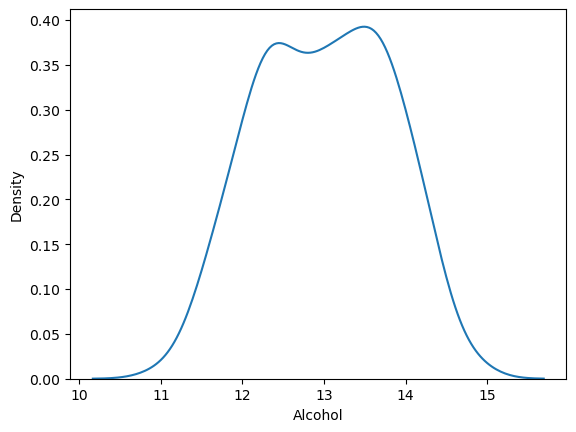

In [13]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic Acid', ylabel='Density'>

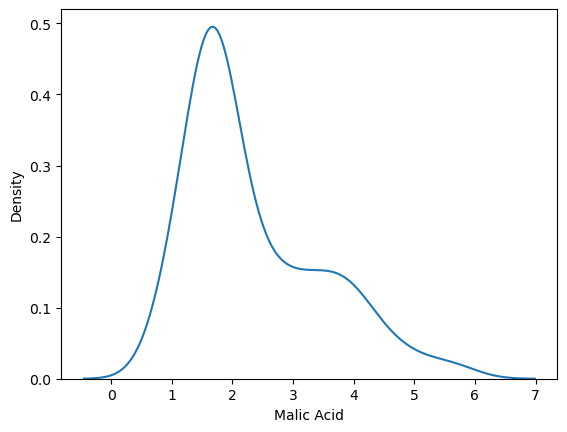

In [15]:
sns.kdeplot(df['Malic Acid'])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

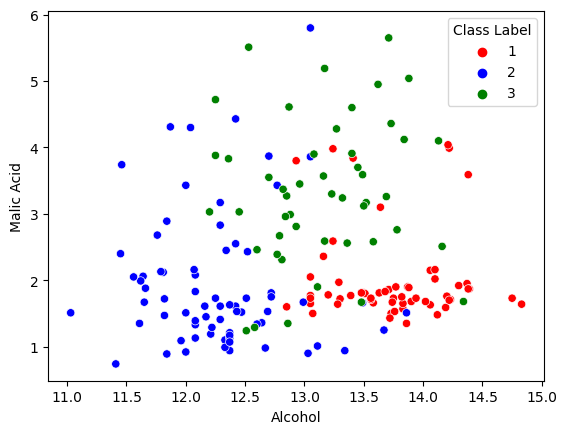

In [17]:
color_dict = {1:'red', 3:'green', 2:'blue'}
sns.scatterplot(x=df['Alcohol'], y=df['Malic Acid'], hue=df['Class Label'], palette=color_dict)

In [21]:
# train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('Class Label', axis=1), df['Class Label'], test_size=0.3, random_state=0)
x_train.shape, x_test.shape

((124, 2), (54, 2))

In [23]:
# now we can normalise
from sklearn.preprocessing import MinMaxScaler

# create an object
scaler = MinMaxScaler()
# fit the data
scaler.fit(x_train)
# transform the data
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [25]:
# make them into a pandas dataframe
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [26]:
# comparing the normalised and original data
np.round(x_train.describe())

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.0
std,1.0,1.0
min,11.0,1.0
25%,12.0,2.0
50%,13.0,2.0
75%,14.0,3.0
max,15.0,6.0


In [28]:
np.round(x_train_scaled.describe())

,Alcohol,Malic Acid
count,124.0,124.0
mean,1.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,1.0,0.0
75%,1.0,0.0
max,1.0,1.0


Note that in this case the mean and standard deviation can be differnet from the original data, but this ensures that the column ranges lie between 0 and 1.

Text(0.5, 1.0, 'After Scaling')

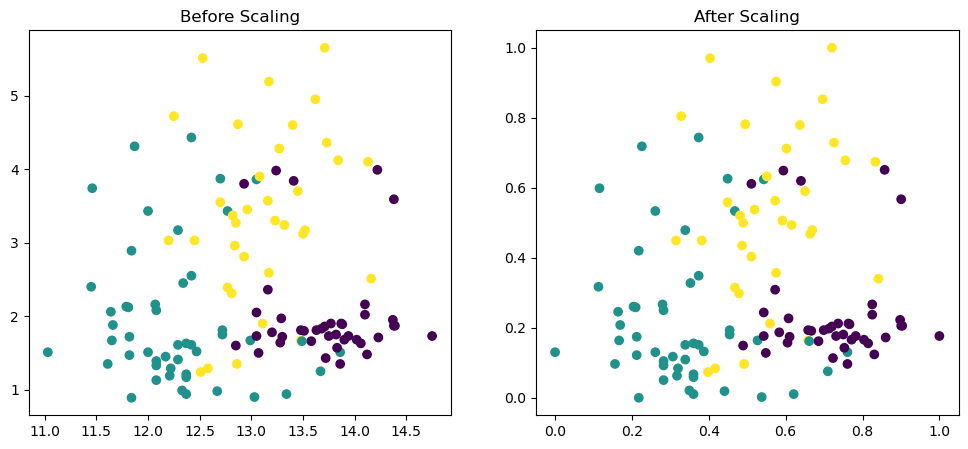

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x=x_train['Alcohol'], y=x_train['Malic Acid'], c=y_train)
ax1.set_title('Before Scaling')

ax2.scatter(x=x_train_scaled['Alcohol'], y=x_train_scaled['Malic Acid'], c=y_train)
ax2.set_title('After Scaling')
# note that the Distribution is still the same!!

<Axes: title={'center': 'Before Scaling'}, xlabel='Alcohol', ylabel='Density'>

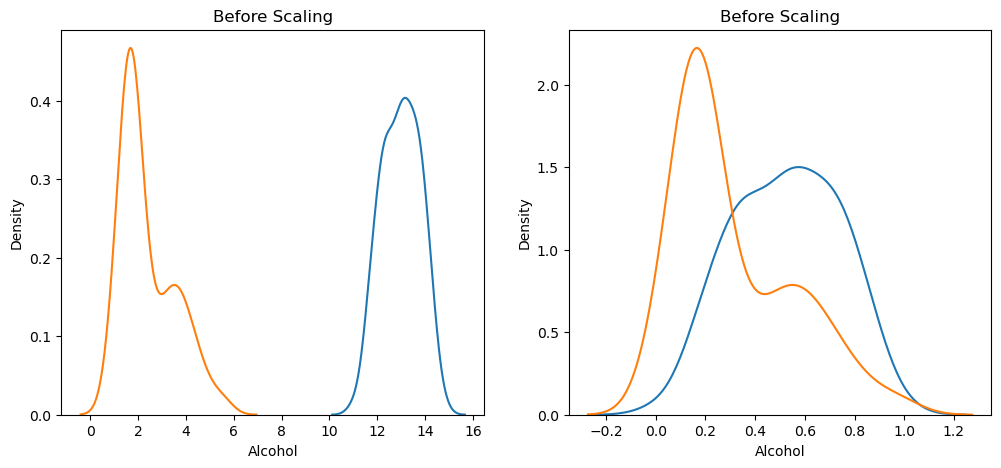

In [34]:
# similarly using the KDE plot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Alcohol'], ax=ax1)
sns.kdeplot(x_train['Malic Acid'], ax=ax1)

# after scaling
ax2.set_title('Before Scaling')
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['Malic Acid'], ax=ax2)

# note that the ranges are same for both the columns 

Note, it is not a necessaity for the distribution to reamin same. It can change in some cases.